## 분류(Classication)

### 분류(Classication)
- 범주(category) 레이블(label)로 주어진 입력과 출력간의 관계를 학습하는 지도학습
- 지도학습(supervised learning) 의 일종으로 기존에 존재하는 데이터의 category 관계를 파악하고, 새롭게 관측된 데이터의 category를 스스로 판별함
- 2개로 분류하는 이항 분류(binary classification)와 그 이상으로 분류하는 다항 분류(multiple classification)가 있음

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/k-nearest-neighbor-algorithm-for-machine-learning2.png" width=600>

이미지출처: https://www.javatpoint.com/k-nearest-neighbor-algorithm-for-machine-learning

### 분류의 예
- 이메일의 스팸 여부 분류
- 단어를 명사와 동사로 분류
- 대출 신청자의 고위험 또는 저위험 여부 결정

## k-최근접 이웃(kNN, k-Nearest Neighbor)
- 새로운 데이터가 들어왔을 때 가장 가까운 이웃의 범주(category)를 확인하여 기존 데이터의 그룹 중 어떤 그룹에 속하는지 분류함.
- k는 탐색할 최근접 이웃의 개수를 의미함.
- kNN의 하이퍼 파라미터는 탐색할 이웃의 수(k)와 거리 측정 방법(distance)임. 이 둘에 의해 분류 경계면이 달라질 수 있음.
- 지도학습(Supervised Learning)이며, 분류와 회귀에 모두 활용 가능함
- Instance-based Learning. 각각의 관측치(instance)만을 이용하여 새로운 데이터에 대한 예측을 함.


### 붓꽃 데이터

#### [code] iris dataset
- 꽃잎(petal) 크기, 꽃받침(sepal) 크기

<img src='https://www.integratedots.com/wp-content/uploads/2019/06/iris_petal-sepal-e1560211020463.png' width=300>
이미지 출처: https://www.integratedots.com/determine-number-of-iris-species-with-k-means/

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

iris = load_iris()

iris_df = pd.DataFrame(iris.data,
                       columns=iris.feature_names)
iris_df['target'] = iris.target
display(pd.concat([iris_df.head(3),
                   iris_df.tail(3)]))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


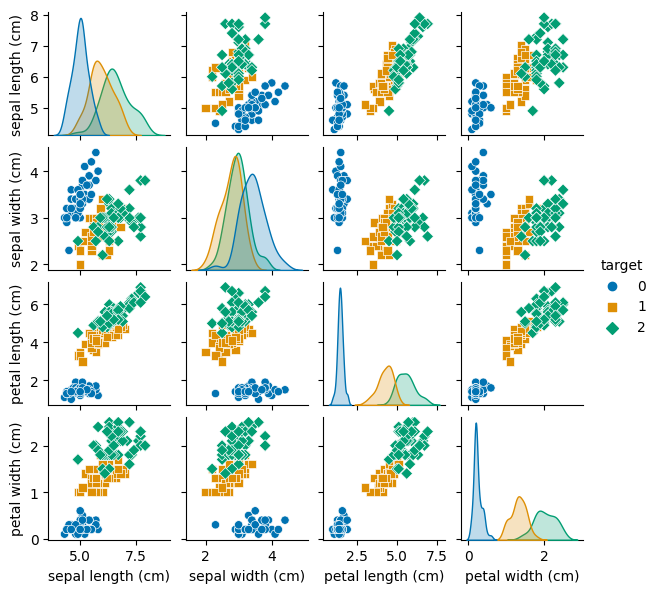

In [ ]:
# sns.pairplot은 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 데이터 열의 조합에 대해 스캐터 플롯을 그림
# 같은 데이터가 만나는 대각선 영역에는 해당 데이터의 히스토그램을 그림
sns.pairplot(iris_df, hue='target', markers=['o', 's', 'D'], palette='colorblind', height=1.5)

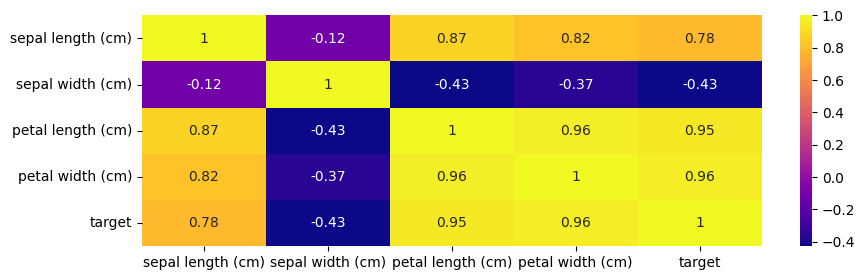

In [ ]:
plt.figure(figsize = (10,3))
sns.heatmap(iris_df.corr(), annot = True, cmap='plasma');

#### [code] sklearn kNN 분류 예측 - 꽃잎(petal)을 기준으로 분류

In [ ]:
# 붓꽃(iris) 데이터
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report

iris = load_iris()
X = iris.data[:, 2:4]
y = iris.target

# 전체 데이터를 학습 데이터와 테스트 데이터를 (65:35) 비율로 분할함
# random_state는 호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값임
# stratify값을 target 값으로 지정해주면 target의 class 비율을 유지 한 채로 데이터 셋을 split 함
seed = 420
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35,
                                                    #stratify=y,
                                                    random_state=seed,
                                                    shuffle=True)
k = 7
knn = KNeighborsClassifier(n_neighbors=k)

# 학습
knn.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = knn.predict(X_test)

# 정확도(Accuracy) 평가: 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단함
scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

0.9622641509433962


In [ ]:
print('X_train.shape', X_train.shape)
print('X_test.shape', X_test.shape)
print('y_train "0" count', list(y_train).count(0))
print('y_train "1" count', list(y_train).count(1))
print('y_train "2" count', list(y_train).count(2))
print('y_test "0" count', list(y_test).count(0))
print('y_test "1" count', list(y_test).count(1))
print('y_test "2" count', list(y_test).count(2))

X_train.shape (97, 2)
X_test.shape (53, 2)
y_train "0" count 31
y_train "1" count 29
y_train "2" count 37
y_test "0" count 19
y_test "1" count 21
y_test "2" count 13


<img src='https://www.scribbr.com/wp-content/uploads/2020/09/stratified-sample-7-2048x863.png' width=600>
이미지 출처: https://www.scribbr.com/methodology/stratified-sampling/

#### [code] sklearn kNN 분류 예측 - 그래프 확인

[5. 2.] virginica
[2. 1.] setosa
[3. 1.] versicolor
[1.2 0.5] setosa
[6.  1.5] virginica


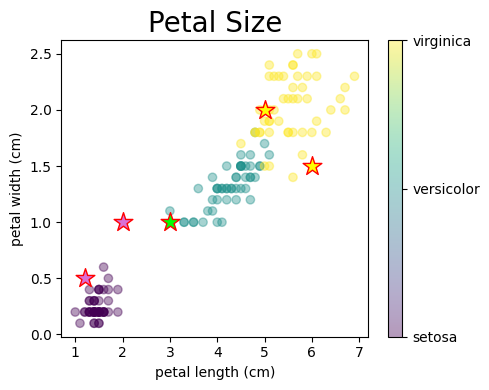

In [ ]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
import numpy as np

formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target, alpha=0.4)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.title('Petal Size', fontsize=20)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])

# 예측
X_new = np.array([[5, 2], [2, 1], [3, 1], [1.2, 0.5], [6, 1.5]])
y_pred = knn.predict(X_new)

target_color = {0:'orchid', 1:'lime', 2:'yellow'}
for xn in range(len(X_new)):
  print(X_new[xn], iris.target_names[y_pred[xn]])
  plt.scatter(X_new[xn][0], X_new[xn][1], marker='*', c=target_color[y_pred[xn]], s=200, linewidths=1, edgecolors='red')

plt.tight_layout()
plt.show()

In [ ]:
# 붓꽃(iris) 데이터
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# 데이터 가져오기
iris = load_iris()
X = iris.data
y = iris.target

# 전체 데이터를 학습 데이터와 테스트 데이터를 (65:35) 비율로 분할함
# random_state는 호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값
# stratify값을 target 값으로 지정해주면 target의 class 비율을 유지 한 채로 데이터 셋을 split 함
seed = 420
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35,
                                                    random_state=seed, shuffle=True, stratify=y)

knn = KNeighborsClassifier(n_neighbors=5)
# 학습
knn.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = knn.predict(X_test)

# 정확도(Accuracy) 평가: 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단함
scores = metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score', scores)

Accuracy Score 1.0


[5, 2, 5, 2] virginica
[5, 4, 2, 1] setosa
[6.5, 2.5, 3, 1] versicolor
[4.2, 2.8, 1.2, 0.5] setosa
[6, 3.5, 6, 1.5] virginica


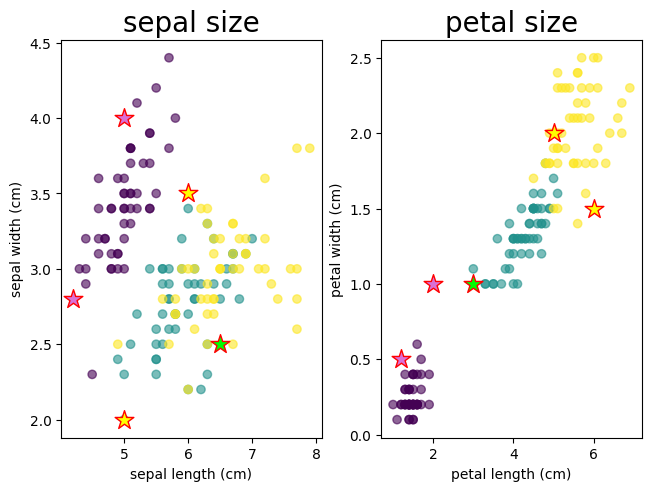

In [ ]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=2, layout='constrained')

x_index, y_index = 0, 1
axs[0].scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target, alpha=0.6)
axs[0].set_title('sepal size', fontsize=20)
axs[0].set_xlabel(iris.feature_names[x_index])
axs[0].set_ylabel(iris.feature_names[y_index])

x_index, y_index = 2, 3
axs[1].scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target, alpha=0.6)
axs[1].set_title('petal size', fontsize=20)
axs[1].set_xlabel(iris.feature_names[x_index])
axs[1].set_ylabel(iris.feature_names[y_index])


# 예측
X_new = [[5, 2, 5, 2], [5, 4, 2, 1], [6.5, 2.5, 3, 1], [4.2, 2.8, 1.2, 0.5], [6, 3.5, 6, 1.5]]
y_pred = knn.predict(X_new)

target_color = {0:'orchid', 1:'lime', 2:'yellow'}
for xn in range(len(X_new)):
  print(X_new[xn], iris.target_names[y_pred[xn]])
  axs[0].scatter(X_new[xn][0], X_new[xn][1], marker='*', c=target_color[y_pred[xn]], s=200, linewidths=1, edgecolors='red')
  axs[1].scatter(X_new[xn][2], X_new[xn][3], marker='*', c=target_color[y_pred[xn]], s=200, linewidths=1, edgecolors='red')

plt.show()

### kNN 거리 계산 방법(distance measure)
- Euclidean Distance: 대응되는 x, y값 간 차이 제곱합의 제곱근으로써, 두 관측치 사이의 직선 거리를 의미
$ d_{(X,Y)} = \sqrt{\sum\limits_{i=1}^n (x_i-y_i)^2} $

- Manhattan Distance: x에서 y로 이동 시 각 좌표축 방향으로만 이동할 경우에 계산되는 거리
$ d_{Manhattan(X,Y)} = {\sum\limits_{i=1}^n \vert{x_i-y_i}\vert } $

- Mahalanobis Distance: 변수 내 분산, 변수 간 공분산을 모두 반영하여 x, y 간 거리를 계산하는 방식
$ d_{Mahalanobis(X,Y)} = {\sqrt {(X-Y)^T \Sigma^{-1} (X-Y)}} ,\quad \Sigma^{-1} $: inverse of covariance matrix

- Correlation Distance - Pearson Correlation: 데이터간 Pearson correlation을 거리측도로 사용하는 방식으로 데이터 패턴의 유사도를 반영할 수 있음
$ d_{Corr(X,Y)} = {1-r} ,\quad where r = \sigma_{XY} $

- Correlation Distance - Spearman Rank Correlation: $\rho$를 Spearman correlation이라 하며, 이는 데이터의 rank를 이용하여 correlation distance를 계산하는 방식. $\rho$의 범위는 -1부터 1로, Pearson correlation과 동일
$ d_{Spearman(X,Y)} = 1 - \rho ,\quad where \rho = 1 - {{6 \sum\nolimits_{i=1}^n (rank(x_i)-rank(y_i))^2} \over {n(n^2-1)}}$


#### [code] kNN 거리 계산 방법 - [L2]Euclidean Distance
- $ d_{(X,Y)} = \sqrt{\sum\limits_{i=1}^n (x_i-y_i)^2} $
- https://needjarvis.tistory.com/454

In [ ]:
def euclidean_distance(a, b):
  sum = 0

  for i in range(len(a)):
    sum = sum + (a[i] - b[i]) ** 2

  distance = sum ** 0.5

  return distance

a = [-1, 2, 3]
b = [4, 0, -3]
print(euclidean_distance(a, b))

8.06225774829855


#### [code] kNN 거리 계산 방법 - [L1]Manhattan Distance
- $ d_{Manhattan(X,Y)} = {\sum\limits_{i=1}^n \vert{x_i-y_i}\vert } $
- https://needjarvis.tistory.com/455

In [ ]:
# 하이퍼파라미터: 거리 계산 방법(distance measure) 결정
def manhattan_distance(a, b):
  sum = 0

  for i in range(len(a)):
    sum = sum + abs(a[i] - b[i])

  distance = sum

  return distance

a = [-1, 2, 3]
b = [4, 0, -3]
print(manhattan_distance(a, b))

13


### kNN 알고리즘(k-Nearest Neighbor)
- kNN 알고리즘이란?
  - 데이터를 입력 받았을 때 이미 분류 항목을 알고 있는 데이터 집합에서 가장 유사한 데이터를 살펴보고 다수결 원칙을 통해 분류 항목을 결정함

- kNN 알고리즘 절차
  0. 하이퍼파라미터를 결정함
    - 1) 인접한 이웃의 개수인 k를 선택함
    - 2) 거리(distance) 계산 방법을 결정함. (Euclidean distance)
  1. 새로운 데이터와 모든 데이터와의 거리를 계산.
  2. 거리에 따라 이웃을 오름차순으로 정렬.
  3. 새로운 데이터와의 거리가 가장 짧은 데이터 k개의 이웃을 찾음.
  4. k개의 인접 데이터 중 각 class에 해당하는 데이터의 수를 카운트(count)함.
  5. 새 데이터를 이웃의 수가 최대인 class에 할당.

- 파라미터의 종류
  - 파라미터(Parameter) - 모델 내부에서 결정되거나 데이터에 의해 값이 결정.
  - 하이퍼파라미터(Hyperparameters) - 사용자가 직접 결정.

#### [code] kNN 알고리즘 pandas로 구현

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(iris.data,
                       columns=iris.feature_names)
X = iris_df.iloc[:,[2,3]]
y = pd.DataFrame(iris.target, columns=['target'])

In [ ]:
# 0. 인접한 이웃의 개수인 하이퍼파라미터 값인 k를 선택
k = 5

In [ ]:
# 1. 새로운 데이터와 모든 데이터와의 거리(Euclidean distance)를 계산
X_new = np.array([5.2, 1.5])
print(X - X_new)

     petal length (cm)  petal width (cm)
0                 -3.8              -1.3
1                 -3.8              -1.3
2                 -3.9              -1.3
3                 -3.7              -1.3
4                 -3.8              -1.3
..                 ...               ...
145                0.0               0.8
146               -0.2               0.4
147                0.0               0.5
148                0.2               0.8
149               -0.1               0.3

[150 rows x 2 columns]


In [ ]:
#distance = np.sqrt((X.iloc[:,0] - X_new[0]) ** 2 + (X.iloc[:,1] - X_new[1]) ** 2)
distance = np.sqrt(np.sum((X - X_new) ** 2, axis=1))
print(distance)

0      4.016217
1      4.016217
2      4.110961
3      3.921734
4      4.016217
         ...   
145    0.800000
146    0.447214
147    0.500000
148    0.824621
149    0.316228
Length: 150, dtype: float64


In [ ]:
# 2. 거리에 따라 이웃을 오름차순으로 정렬
# argsort: ndarray를 정렬한 인덱스 배열을 반환함
arg_distance = distance.argsort()
print(arg_distance)
print(distance[arg_distance])

0      133
1       83
2      119
3       77
4       72
      ... 
145     36
146     14
147     35
148     13
149     22
Length: 150, dtype: int64
133    0.100000
83     0.141421
119    0.200000
77     0.282843
72     0.300000
         ...   
36     4.110961
14     4.205948
35     4.205948
13     4.332436
22     4.396590
Length: 150, dtype: float64


In [ ]:
# 3. 새로운 데이터와의 거리가 가장 짧은 데이터 k개의 이웃을 찾음
y = np.array(y).reshape(-1)
sorted_labels = y[arg_distance]
K_nearest_labels = list(sorted_labels[:k])
print(K_nearest_labels)

[2, 1, 2, 1, 1]


In [ ]:
# 4. k개의 인접 데이터 중 각 class에 해당하는 데이터의 수를 카운트(count)
#K_nearest_labels.value_counts()
count_dict = {}
for label in K_nearest_labels:
	count_dict[label] = count_dict.get(label,0) + 1
count_dict

print(count_dict)

{2: 2, 1: 3}


In [ ]:
# 5. 새 데이터를 이웃의 수가 최대인 class에 할당
_labels, count_labels = np.array(list(count_dict.keys())), np.array(list(count_dict.values()))
y_new = _labels[count_labels.argmax()]
print(y_new)

1


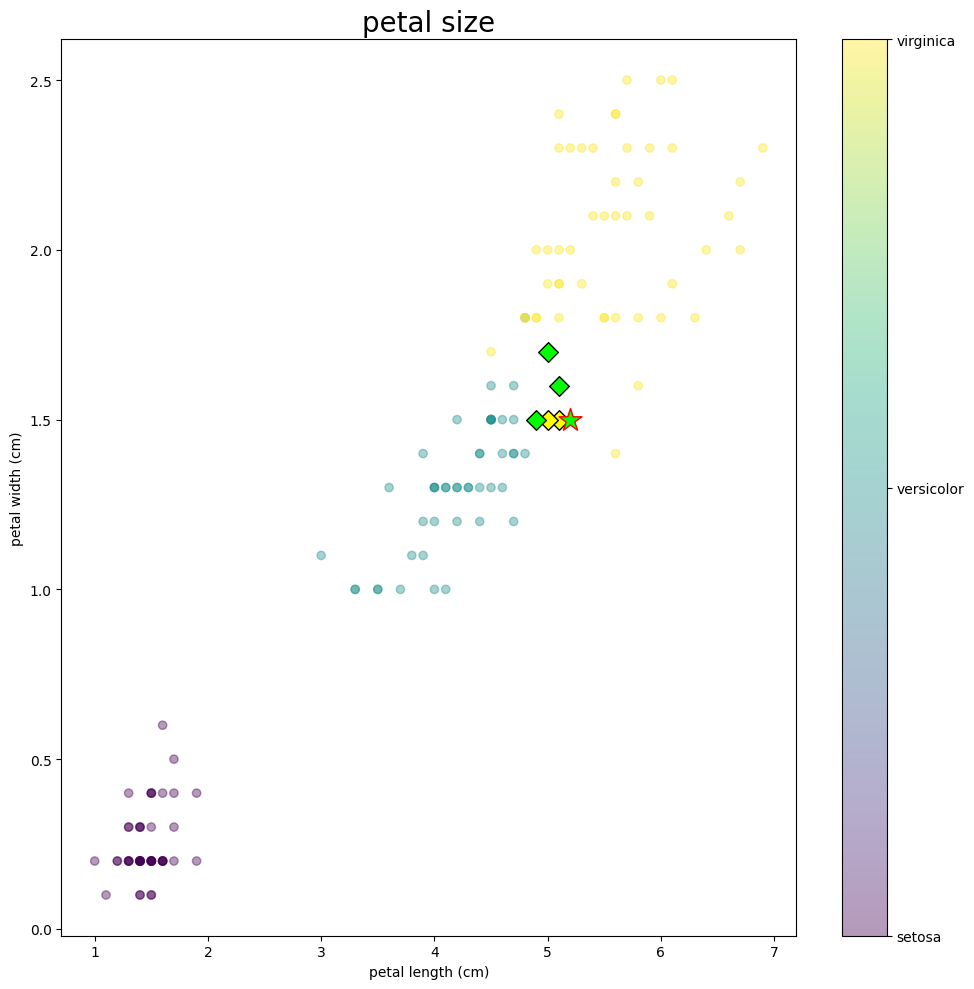

X_nearest: [[5.1, 1.5], [5.1, 1.6], [5.0, 1.5], [5.0, 1.7], [4.9, 1.5]]
y_nearest: [2, 1, 2, 1, 1]
X_new: [5.2 1.5]
y_new: 1


In [ ]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt

formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(10, 10))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=iris.target, alpha=0.4)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.title('petal size', fontsize=20)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])

# 예측
X_nearest = []
y_nearest = []

for i in range(k):
  X_nearest.append([X.loc[arg_distance[i]][0], X.loc[arg_distance[i]][1]])
  y_nearest.append(y[arg_distance[i]])

target_color = {0:'orchid', 1:'lime', 2:'yellow'}
for xn in range(len(X_nearest)):
  plt.scatter(X_nearest[xn][0], X_nearest[xn][1], marker='D', c=target_color[y_nearest[xn]], s=100, linewidths=1, edgecolors='black')

plt.scatter(X_new[0], X_new[1], marker='*', c=target_color[y_new], s=300, linewidths=1, edgecolors='red')

plt.tight_layout()
plt.show()


print('X_nearest:', X_nearest)
print('y_nearest:', y_nearest)
print('X_new:', X_new)
print('y_new:', y_new)

#### [code] kNN 알고리즘 numpy로 구현

In [14]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [15]:
def knn(X_new, X, y, k):

  # 1. 새로운 데이터와 모든 데이터와의 거리(Euclidean distance)를 계산
  dists = np.sqrt(np.sum((X_new-X)**2, axis=1))
  
  # 2. 거리에 따라 이웃을 오름차순으로 정렬
  sorted_index = dists.argsort()

  # 3. 새로운 데이터와의 거리가 가장 짧은 데이터 k개의 이웃을 찾음
  sorted_labels = y[sorted_index]
  K_nearest_labels = sorted_labels[:k]

  # 4. k개의 인접 데이터 중 각 class에 해당하는 데이터의 수를 카운트(count)
  count_dict = {}
  for label in K_nearest_labels:
    count_dict[label] = count_dict.get(label,0) + 1
  count_dict
  _labels, count_labels = np.array(list(count_dict.keys())), np.array(list(count_dict.values()))

  # 5. 새 데이터를 이웃의 수가 최대인 class에 할당
  return _labels[count_labels.argmax()]

In [16]:
X_new = np.array([5.2, 1.5])
for k in range(1, 10, 2):
  print(k, knn(X_new, X, y, k))

1 2
3 2
5 1
7 1
9 2


## k의 값 결정
- k값(# of nearest neighbors)
  - 하이퍼파라미터 값인 k를 선택
  - k는 인접한 이웃의 개수
- k값의 선택방법
  - 일정 범위 내로 k 값을 조정해가며 결과를 관찰하고 가장 좋은 결과를 보이는 k 값을 선정함. (그리드 서치)
  - k가 매우 작을 경우: 데이터의 지역적 특성을 지나치게 반영함 (overfitting)
  - k가 매우 클 경우: 다른 범주의 개체를 너무 많이 포함하여 오분류할 위험이 있음 (underfitting)

### 정확도(Accuracy)
- 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표임
- 머신러닝의 성능 평가 지표 중 하나임
- 불균형한 label 값 분포에서 ML 모델의 성능을 판단할 경우, 적합하지 않음
- 올바르게 예측된 데이터의 수를 전체 데이터의 수로 나눈 값임. $ Accuracy = {{TP+TN} \over {TP+TN+FP+FN}} $

<img src='https://miro.medium.com/v2/resize:fit:720/format:webp/1*jtxjF2NEgiCAoRoJCnTeXw.png' width=400>

이미지 출처: https://bhcboy100.medium.com/머신러닝-분류-평가지표-이해하기-정확도-정밀도-재현율-f1-스코어-6bf91535a01a

#### [code] 정확도(Accuracy)로 찾은 최적의 k값

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score
from tqdm import tqdm

iris = load_iris()
X = iris.data[:, :2]
y = iris.target

seed = 420
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35,
                                                    random_state=seed, shuffle=True, stratify=y)

k_list = [i for i in range(1,96) if i%2 !=0]
score_list = []

for k in tqdm(k_list):
    knn = KNeighborsClassifier(n_neighbors = k, p=2)  # p=1: manhattan_distance , p=2: euclidean_distance
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    score_list.append(score)

100%|██████████| 48/48 [00:00<00:00, 55.06it/s]


Best k value :  [9, 23]


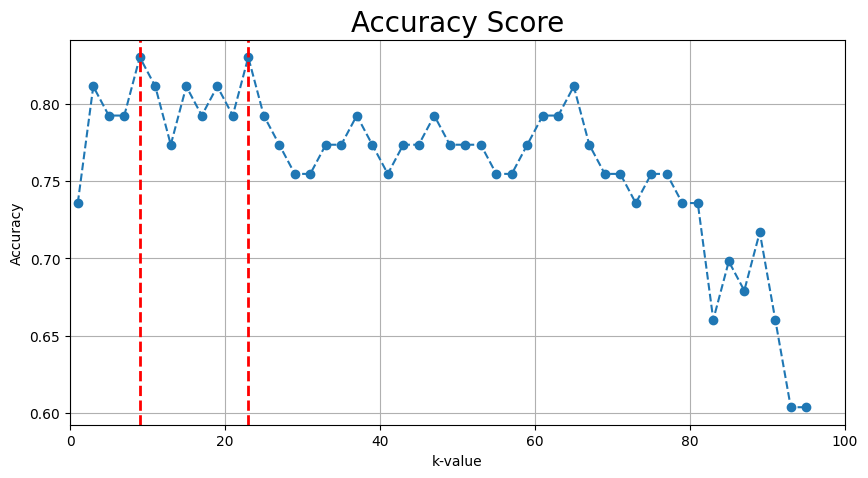

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.title("Accuracy Score", fontsize=20)
plt.xlabel("k-value")
plt.ylabel("Accuracy")
plt.xlim(0, 100)
plt.grid(visible=True)

# score 선 그리기
plt.plot(k_list, score_list, marker='o', linestyle='dashed')

# best_k 수직선 그리기
best_k = [k_list[i] for i in range(len(score_list)) if score_list[i] == np.max(score_list)]
print("Best k value : ", best_k)
for i in range(len(best_k)):
  plt.axvline(best_k[i], color='r', linestyle='--', linewidth=2)

plt.show()

### 과소적합(underfitting) vs 과잉적합(overfitting)

- 과소적합(underfitting)이란 학습 데이터에서도 성능이 좋지 않은 경우. 이 경우에는 모델 자체가 적합지 않은 경우가 많음. 더 나은 모델을 찾아야 함.
- 과잉적합(overfitting)이란 학습하는 데이터에서는 성능이 뛰어나지만 새로운 데이터(일반화)에 대해서는 성능이 잘 나오지 않는 모델을 생성하는 것임.

**회귀(Regression)**

<img src='https://miro.medium.com/v2/resize:fit:720/format:webp/1*_7OPgojau8hkiPUiHoGK_w.png' width=800>

이미지 출처: https://medium.com/@cs.sabaribalaji/overfitting-6c1cd9af589



**분류(Classification)**

<img src='https://miro.medium.com/max/1500/1*UCd6KrmBxpzUpWt3bnoKEA.png' width=800>

이미지 출처: https://blog.naver.com/PostView.nhn?blogId=qriositylog&logNo=221643136657


#### [code] 과소 적합, 과잉적합 그래프로 확인하기

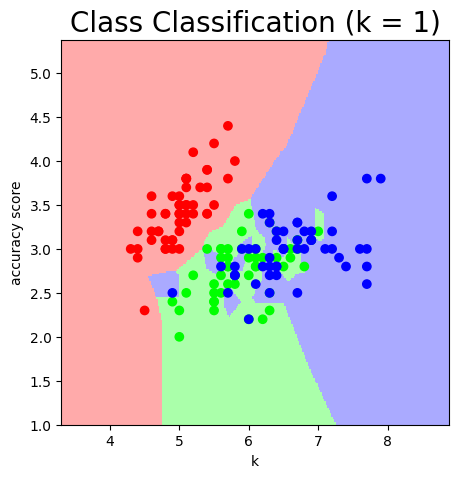

Accuracy Score (k = 1) 0.7358490566037735


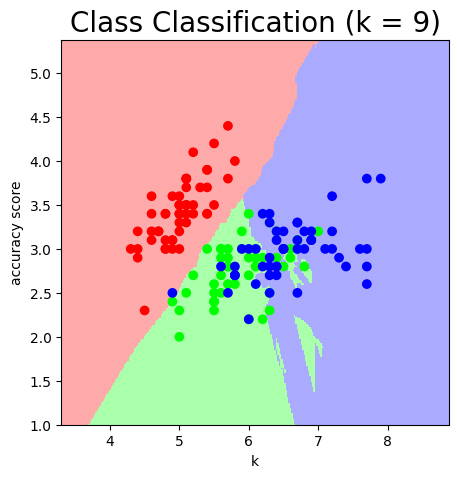

Accuracy Score (k = 9) 0.8301886792452831


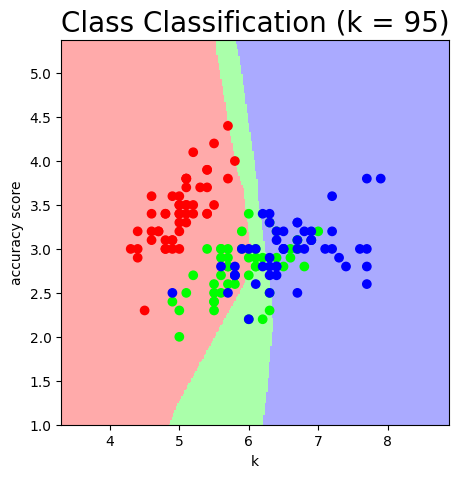

Accuracy Score (k = 95) 0.6037735849056604


In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

import matplotlib
from matplotlib.colors import ListedColormap

iris = load_iris()
X = iris.data[:, :2]
y = iris.target
h = .02  # step size in the mesh

seed = 420
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35,
                                                    random_state=seed, shuffle=True, stratify=y)

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for k in [1, 9, 95]:

    # we create an instance of Neighbours Classifier and fit the data.
    knn = KNeighborsClassifier(n_neighbors = k, p=2)  # p=1: manhattan_distance , p=2: euclidean_distance
    knn.fit(X_train, y_train)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(5,5))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Class Classification (k = {k})", fontsize=20)
    plt.xlabel('k')
    plt.ylabel('accuracy score')

    plt.show()

    y_pred = knn.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    print(f"Accuracy Score (k = {k})", score)

## kNN의 변형

### ML Classification Algorithms
- Linear Models
  - Logistic Regression
  - Support Vector Machines
- Non-linear Models
  - K-Nearest Neighbours
  - Kernel SVM
  - Naïve Bayes
  - Decision Tree Classification
  - Random Forest Classification

- weighted kNN
  - kNN이 가까운 데이터와 먼 데이터를 모두 동일한 가중치로 적용하고 있는 한계를 극복하기 위해 고안함.
  - 테스트 데이터 학습 데이터 간의 거리를 반비례한 값을 weight 값으로 정의하여 가까운 데이터에 가중치를 부여함.
<img src='https://ai-master.gitbooks.io/knn/content/assets/image8.png' width=700>

- fixed radius kNN
  - 테스트 지점에서 설정된 고정된 반경 내에 있는 데이터를 기준으로 분류함
<img src='https://ai-master.gitbooks.io/knn/content/assets/image6.png' width=700>

이미지 출처: https://ai-master.gitbooks.io/knn/content/simple-extensions.html

#### [code] sklearn kNN 변형 알고리즘

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score
from tqdm import tqdm

iris = load_iris()
X = iris.data[:, :2]
y = iris.target

seed = 420
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35,
                                                    random_state=seed, shuffle=True, stratify=y)

# Set Hyperparameter
k = 7
d = 1

# kNN
# p=1: manhattan_distance , p=2: euclidean_distance
#knn = knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', p=d)

# weighted kNN
knn = knn = KNeighborsClassifier(n_neighbors=k, weights='distance', p=d)


# Set Hyperparameter
r = 0.5
d = 2

# fixed radius kNN
#knn = RadiusNeighborsClassifier(radius=r, p=d)

# fixed radius weighted kNN
#knn = RadiusNeighborsClassifier(radius=r, weights='distance', p=d)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print(score)

0.7735849056603774


[5. 2.] versicolor
[5. 4.] setosa
[6.5 2.5] virginica
[4.2 2.8] setosa
[6.  3.5] versicolor


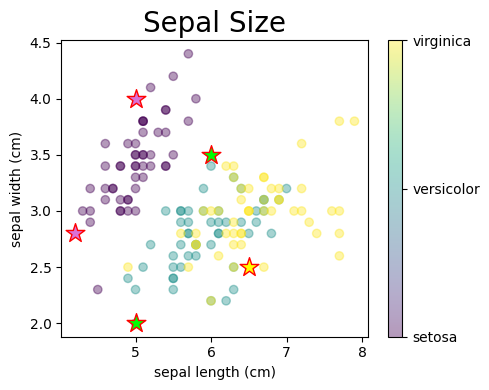

In [ ]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt

formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target, alpha=0.4)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.title('Sepal Size', fontsize=20)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

# 예측
X_new = np.array([[5, 2], [5, 4], [6.5, 2.5], [4.2, 2.8], [6, 3.5]])
y_pred = knn.predict(X_new)

target_color = {0:'orchid', 1:'lime', 2:'yellow'}
for xn in range(len(X_new)):
  print(X_new[xn], iris.target_names[y_pred[xn]])
  plt.scatter(X_new[xn][0], X_new[xn][1], marker='*', c=target_color[y_pred[xn]], s=200, linewidths=1, edgecolors='red')

plt.tight_layout()
plt.show()

## Reference
- Numpy을 활용한 머신러닝 구현 - KNN 분류기
  - https://github.com/public-ai/dl-lecture/blob/master/ml-homework/1_Numpy%EB%A5%BC%20%ED%99%9C%EC%9A%A9%ED%95%9C%20%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%20-%20KNN%20%EB%B6%84%EB%A5%98%EA%B8%B0.ipynb
- 김성범 인공지능 연구소 - 파이썬 실습 KNN
  - https://github.com/DMQA/Python-codes-for-machine-learning-algorithms/blob/main/07.%20K-nearest%20neighbors%20%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EC%8B%A4%EC%8A%B5_KNN.ipynb